**KMeans Clustering**

Consider students in class

- tell the machine k = 3
- Drop 3 random point
- Group Leaders
- Move Leaders towards centroid
- Repeat until leaders don't switch

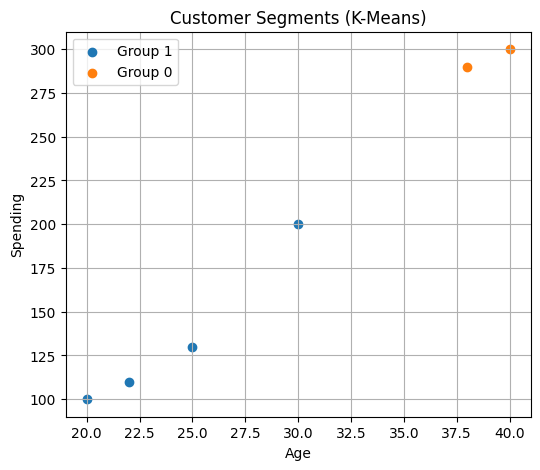

  Customer  Age  Spending  Group
0     Riya   20       100      1
1     Aman   30       200      1
2   Faizan   40       300      0
3     Neha   22       110      1
4    Imran   38       290      0
5    Sneha   25       130      1


In [2]:
import pandas as pd 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = {
    'Customer' : ['Riya','Aman','Faizan','Neha','Imran','Sneha'],
    'Age' : [20,30,40,22,38,25],
    'Spending' : [100,200,300,110,290,130]
}

df = pd.DataFrame(data)

x = df[['Age','Spending']]
model = KMeans(n_clusters=2,random_state=42,n_init=10)
df['Group'] = model.fit_predict(x)

plt.figure(figsize=(6,5))
for group in df['Group'].unique():
    group_data = df[df['Group']==group] # checks if is this in 0 or 1
    plt.scatter(group_data['Age'],group_data['Spending'],label=f'Group {group}')

plt.xlabel('Age')
plt.ylabel('Spending')
plt.title('Customer Segments (K-Means)')
plt.legend()
plt.grid(True)
plt.show()

print(df)

**Principal Component Analysis**

Variance captured by each PCA component : 
[99.65  0.35]


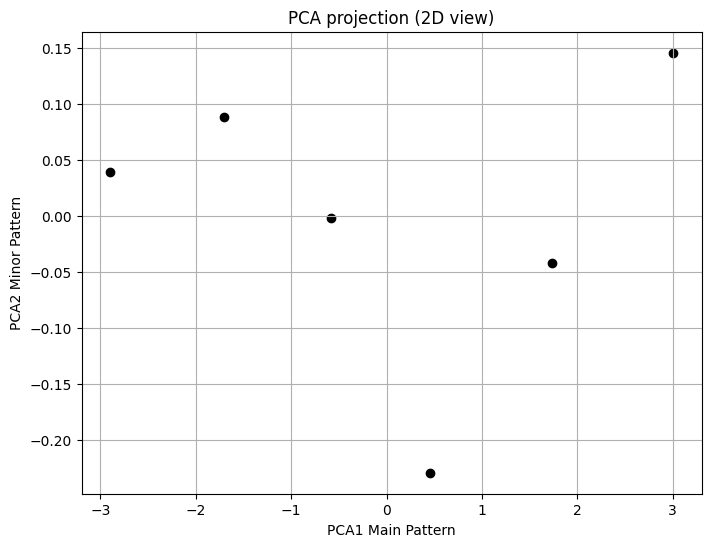

New data with 2 features PCA1 PCA2
       PCA1      PCA2
0 -2.901838  0.038962
1 -1.703939  0.088054
2 -0.585677 -0.001447
3  0.452949 -0.229542
4  1.730485 -0.041856
5  3.008020  0.145829


In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data = {
    'Age' : [25,30,35,40,45,50],
    'Income' : [30000,40000,50000,60000,70000,80000],
    'Spending' : [70,60,50,40,30,20],
    'Savings' : [1000,5000,8000,10000,15000,20000]
}

df = pd.DataFrame(data)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df) # converts to z scores = (x-mean)/(standard deviation)
pca = PCA(n_components=2) # shrink my data into just 2 columns
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result,columns=['PCA1','PCA2'])
explained_variance = pca.explained_variance_ratio_
print("Variance captured by each PCA component : ")
print(np.round(explained_variance*100,2)) # Percentage

plt.figure(figsize=(8,6))
plt.scatter(pca_df['PCA1'],pca_df['PCA2'],color='black')
plt.title("PCA projection (2D view)")
plt.xlabel('PCA1 Main Pattern')
plt.ylabel('PCA2 Minor Pattern')
plt.grid(True)
plt.show()

print("New data with 2 features PCA1 PCA2")
print(pca_df)